## Real Estate Data Analysis

#### By: Naveen B


### Problem Statement
 
- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

#### Importing Dataset


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

### Setting UID as index

In [6]:
df_train.set_index("UID",inplace=True) #UID is set as index
df_test.set_index("UID",inplace=True) #UID is set as index

In [7]:
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [8]:
df_test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [9]:
print("Shape of Train dataset is {} and Test dataset is {}".format(df_train.shape,df_test.shape))

Shape of Train dataset is (27321, 79) and Test dataset is (11709, 79)


#### Checking for columns with zero variance 

In [10]:
var_zero_train=[]
for col in df_train.select_dtypes(exclude="object").columns:
    if df_train[col].var()==0:
        var_zero_train.append(col)
print("{} columns with Zero variance and columns are :{}".format(len(var_zero_train),var_zero_train))

1 columns with Zero variance and columns are :['SUMLEVEL']


In [11]:
var_zero_test=[]
for col in df_test.select_dtypes(exclude="object").columns:
    if df_test[col].var()==0:
        var_zero_test.append(col)
print("{} columns with Zero variance and columns are :{}".format(len(var_zero_test),var_zero_test))

1 columns with Zero variance and columns are :['SUMLEVEL']


- Dropping Columns SUMLEVEL, BLOCKID, primary as it has zero variance

In [12]:
df_train.drop(["BLOCKID","SUMLEVEL","primary"],axis=1,inplace=True)
df_test.drop(["BLOCKID","SUMLEVEL","primary"],axis=1,inplace=True)

#### Checking for columns with missing Values

In [13]:
missing_col_train={}

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        missing_col_train[col]=df_train[col].isnull().sum() 

print("There are {} columns in train data with missing values ".format(len(missing_col_train)))
pd.Series(missing_col_train).sort_values(ascending=False)

There are 58 columns in train data with missing values 


hc_mean                        600
hc_sample_weight               600
hc_stdev                       600
hc_samples                     600
hc_median                      600
hc_mortgage_sample_weight      573
hc_mortgage_samples            573
hc_mortgage_stdev              573
hc_mortgage_median             573
hc_mortgage_mean               573
home_equity_cdf                457
second_mortgage_cdf            457
home_equity_second_mortgage    457
second_mortgage                457
home_equity                    457
debt_cdf                       457
debt                           457
rent_median                    314
rent_stdev                     314
rent_sample_weight             314
rent_gt_30                     314
rent_gt_35                     314
rent_gt_10                     314
rent_gt_15                     314
rent_gt_20                     314
rent_gt_25                     314
rent_gt_50                     314
rent_gt_40                     314
rent_samples        

In [14]:
missing_col_test={}

for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        missing_col_test[col]=df_test[col].isnull().sum()/len(df_test) 

print("There are {} columns in test data with missing values ".format(len(missing_col_test)))
pd.Series(missing_col_test).sort_values(ascending=False)

There are 58 columns in test data with missing values 


hc_mean                        0.024767
hc_sample_weight               0.024767
hc_stdev                       0.024767
hc_samples                     0.024767
hc_median                      0.024767
hc_mortgage_sample_weight      0.022888
hc_mortgage_samples            0.022888
hc_mortgage_stdev              0.022888
hc_mortgage_median             0.022888
hc_mortgage_mean               0.022888
home_equity_cdf                0.018789
debt_cdf                       0.018789
home_equity_second_mortgage    0.018789
second_mortgage                0.018789
home_equity                    0.018789
debt                           0.018789
second_mortgage_cdf            0.018789
rent_gt_35                     0.012725
rent_gt_30                     0.012725
rent_gt_10                     0.012725
rent_gt_15                     0.012725
rent_gt_20                     0.012725
rent_gt_25                     0.012725
rent_gt_50                     0.012725
rent_gt_40                     0.012725


In [15]:
df_train[[*missing_col_train]].agg(["mean","median"])

,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
mean,1055.129032,1007.672789,394.256202,295.979447,548.005702,0.957824,0.867134,0.739429,0.612959,0.499994,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
median,953.193930,897.000000,346.397060,219.210100,424.000000,0.977070,0.888160,0.758170,0.625000,0.503790,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205


#### Imputing columns with missing values

In [16]:
imputer=SimpleImputer(strategy="mean")
for col in [*missing_col_train]:
    df_train[col]=imputer.fit_transform(df_train[[col]])
    df_test[col]=imputer.transform(df_test[[col]])

### Debt analysis

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent the upper limit for the percent of households with a second mortgage to 50 percent. 
- Visualize using geo-map. 


In [17]:
top_2500=df_train[ (df_train["second_mortgage"] <.50) & (df_train['pct_own'] > .10)].sort_values(by=["second_mortgage","pct_own"],ascending=False)

In [18]:
top_2500[['home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',"pct_own",'zip_code', 'area_code', 'lat', 'lng']].head()

,home_equity_second_mortgage,second_mortgage,home_equity,debt,pct_own,zip_code,area_code,lat,lng
UID,,,,,,,,,
251185,0.43363,0.43363,0.43363,0.84956,0.20247,1610,508,42.254262,-71.800347
269323,0.31818,0.31818,0.40341,0.78409,0.15618,11368,718,40.751809,-73.853582
251324,0.27739,0.30212,0.35689,0.87633,0.22380,21061,410,39.127273,-76.635265
235788,0.28972,0.28972,0.38785,0.78972,0.11618,33614,813,28.029063,-82.495395
242304,0.28899,0.28899,0.40826,0.83945,0.14228,60640,773,41.967289,-87.652434


In [19]:
top_2500.to_csv("top_2500.csv")

#### Bad debt

- Bad Debt = P (Second Mortgage ∩ Home Equity Loan) 
- Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [20]:
df_train["bad_debt"]=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

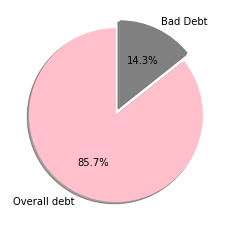

In [21]:
label=["Overall debt","Bad Debt"]
values=[df_train["debt"].sum(),df_train["bad_debt"].sum()]
plt.pie(values,labels=label,autopct='%1.1f%%',explode=(0,.1),startangle=90,shadow=True,colors=["pink","grey"])
plt.show()

- Bad debt is 14.3 % of overall debt

#### Analyzing the distribution for Second mortgage, Home equity, Debt for different cities

In [22]:
df_train["city"].value_counts()[:5]

Chicago         294
Brooklyn        282
Los Angeles     243
Houston         222
Philadelphia    165
Name: city, dtype: int64

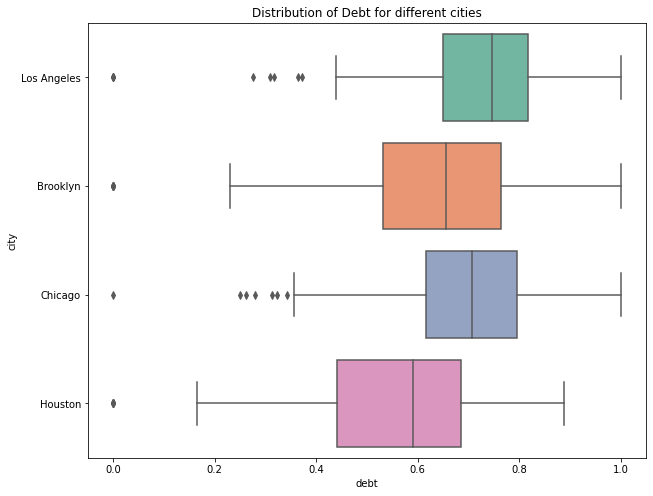

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train.loc[(df_train["city"]=="Chicago") |  (df_train["city"]=="Brooklyn")  |  (df_train["city"]=="Los Angeles") |  (df_train["city"]=="Houston"), :],
                              x="debt",y="city",palette="Set2")
plt.title("Distribution of Debt for different cities")
plt.show()

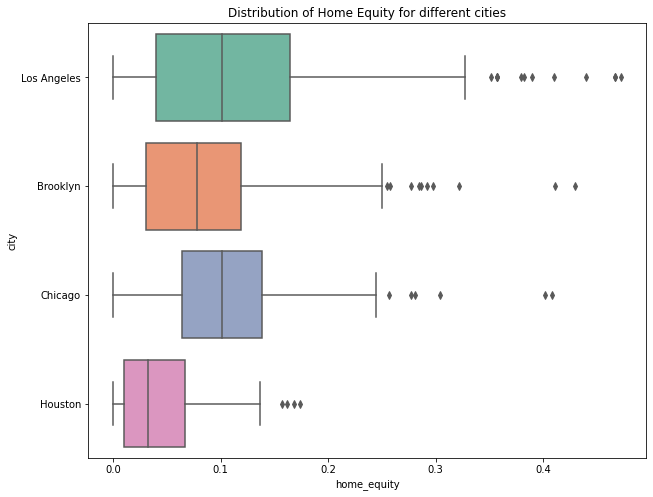

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train.loc[(df_train["city"]=="Chicago") |  (df_train["city"]=="Brooklyn")  |  (df_train["city"]=="Los Angeles") |  (df_train["city"]=="Houston"), :],
                              x="home_equity",y="city",palette="Set2")
plt.title("Distribution of Home Equity for different cities")
plt.show()

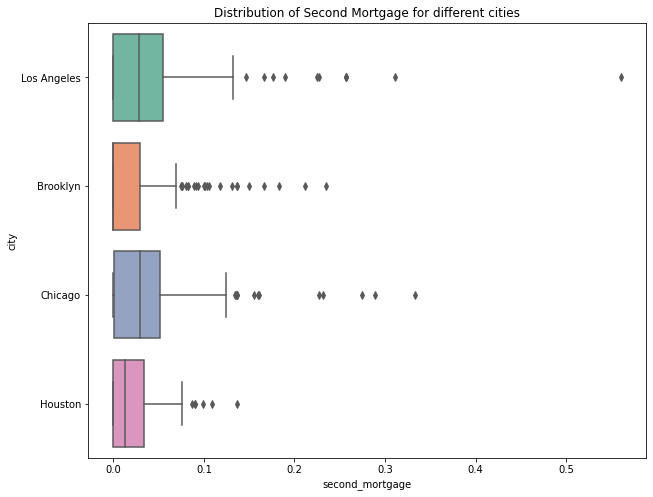

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train.loc[(df_train["city"]=="Chicago") |  (df_train["city"]=="Brooklyn")  |  (df_train["city"]=="Los Angeles") |  (df_train["city"]=="Houston"), :],
                              x="second_mortgage",y="city",palette="Set2")
plt.title("Distribution of Second Mortgage for different cities")
plt.show()

#### Collated income distribution chart for family income, house hold income, and remaining income

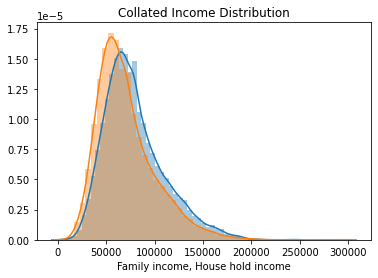

In [26]:
sns.distplot(df_train["family_mean"])
sns.distplot(df_train["hi_mean"])
plt.title("Collated Income Distribution")
plt.xlabel("Family income, House hold income")
plt.show()

### Deriving Population density

In [27]:
df_train["pop_density"]=df_train["pop"]/df_train["ALand"]
df_test["pop_density"]=df_test["pop"]/df_test["ALand"]

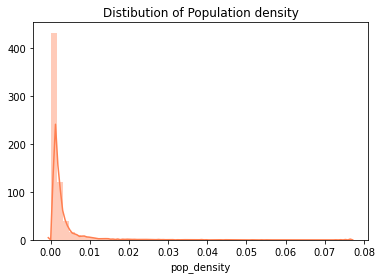

In [28]:
sns.distplot(df_train["pop_density"],color="coral")
plt.title("Distibution of Population density")
plt.show()

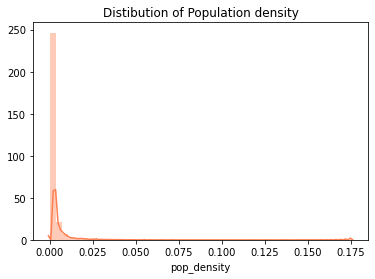

In [29]:
sns.distplot(df_test["pop_density"],color="coral")
plt.title("Distibution of Population density")
plt.show()

#### Deriving Median age 

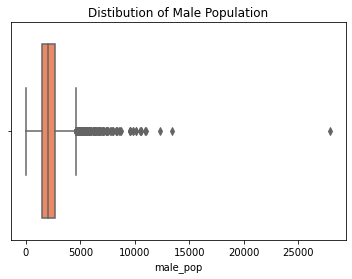

In [30]:
sns.boxplot(df_test["male_pop"],color="coral")
plt.title("Distibution of Male Population")
plt.show()

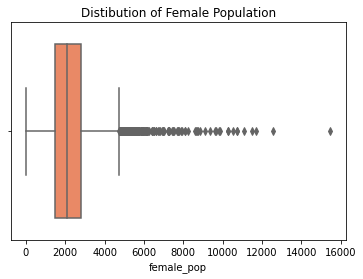

In [31]:
sns.boxplot(df_test["female_pop"],color="coral")
plt.title("Distibution of Female Population")
plt.show()

In [32]:
df_train = df_train[(df_train["male_pop"] > 0) & (df_train["female_pop"] > 0)]
df_test = df_test[(df_test["male_pop"] > 0) & (df_test["female_pop"] > 0)]

• median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)
Visualize the findings using appropriate chart type.


In [33]:
df_train['age_median']=((df_train['male_age_median']*df_train['male_pop']) + (df_train['female_age_median'] *df_train['female_pop']))/(df_train['male_pop'] + df_train['female_pop'] )

In [34]:
df_test['age_median']=(df_test['male_age_median']*df_test['male_pop'] + df_test['female_age_median'] *df_test['female_pop'])/(df_test['male_pop'] + df_test['female_pop'] )

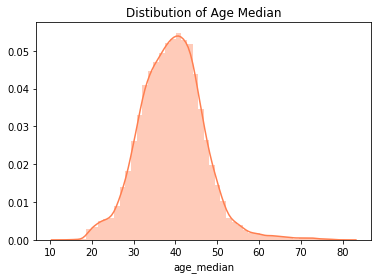

In [35]:
sns.distplot(df_train['age_median'],color="coral")
plt.title("Distibution of Age Median")
plt.show()

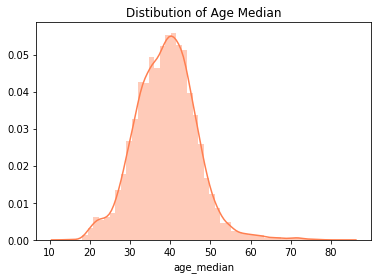

In [36]:
sns.distplot(df_test['age_median'],color="coral")
plt.title("Distibution of Age Median")
plt.show()

#### Creating bins for population into a new variable


In [37]:
df_train["pop"].describe()

count    27108.000000
mean      4348.761325
std       2145.268916
min          5.000000
25%       2914.000000
50%       4061.000000
75%       5442.000000
max      53812.000000
Name: pop, dtype: float64

In [38]:
df_train["pop_category"]=pd.cut(df_train["pop"],bins=[0,3000,6000,9000,100000],labels=["low","medium","high","very_high"],include_lowest=True)
df_test["pop_category"]=pd.cut(df_test["pop"],bins=[0,3000,6000,9000,100000],labels=["low","medium","high","very_high"],include_lowest=True)

#### Analyzing the married, separated and divorced population for these population brackets

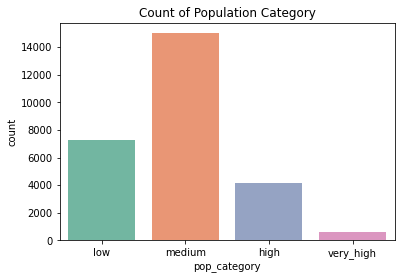

In [39]:
sns.countplot(df_train["pop_category"],palette="Set2")
plt.title("Count of Population Category")
plt.show()

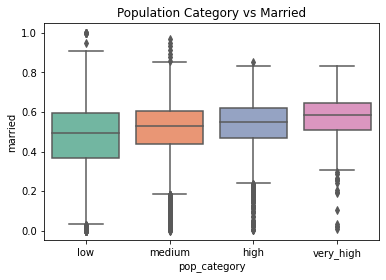

In [40]:
sns.boxplot(x=df_train["pop_category"],y=df_train["married"],palette="Set2")
plt.title("Population Category vs Married")
plt.show()

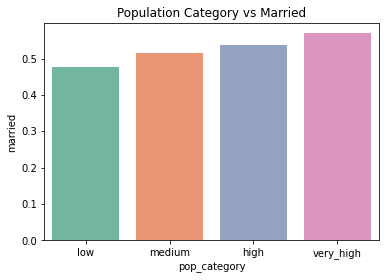

In [41]:
sns.barplot(x=df_train["pop_category"],y=df_train["married"],palette="Set2",ci=None)
plt.title("Population Category vs Married")
plt.show()

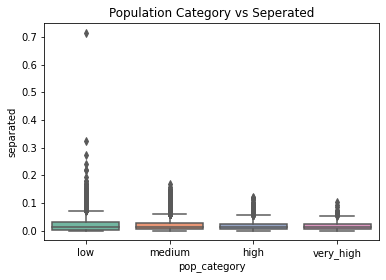

In [42]:
sns.boxplot(x=df_train["pop_category"],y=df_train["separated"],palette="Set2")
plt.title("Population Category vs Seperated")
plt.show()

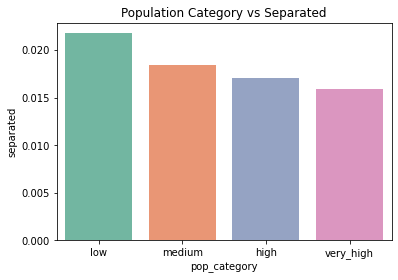

In [43]:
sns.barplot(x=df_train["pop_category"],y=df_train["separated"],palette="Set2",ci=None)
plt.title("Population Category vs Separated")
plt.show()

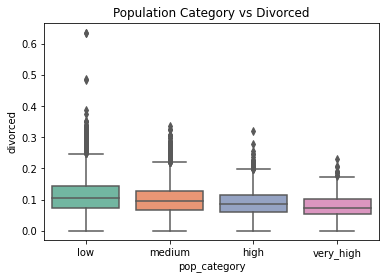

In [44]:
sns.boxplot(x=df_train["pop_category"],y=df_train["divorced"],palette="Set2")
plt.title("Population Category vs Divorced")
plt.show()

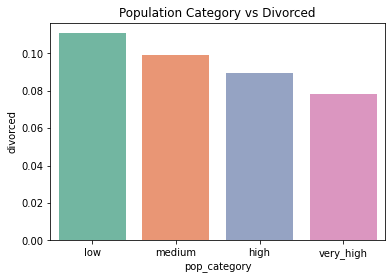

In [45]:
sns.barplot(x=df_train["pop_category"],y=df_train["divorced"],palette="Set2",ci=None)
plt.title("Population Category vs Divorced")
plt.show()

#### Percentage of income at an overall level and for different states.

In [46]:
state_rent=df_train.groupby("state")["rent_mean","family_mean"].sum()

In [47]:
state_rent["rent_percent"]=state_rent["rent_mean"]/state_rent["family_mean"]

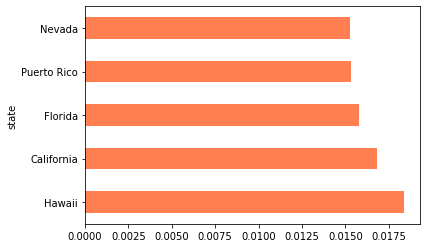

In [48]:
state_rent.sort_values("rent_percent",ascending=False)[:5]["rent_percent"].plot(kind="barh",color="coral");

In [49]:
df_train.to_csv("df_cleaned.csv")

### Correlation Analysis

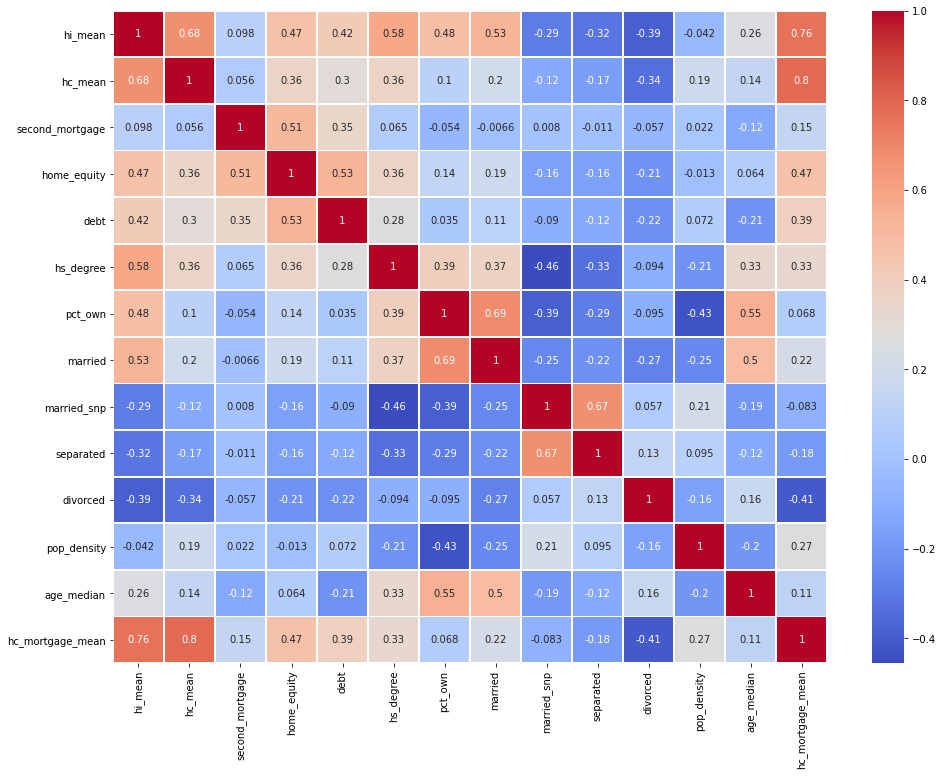

In [50]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train[['hi_mean','hc_mean', 
       'second_mortgage', 'home_equity', 'debt','hs_degree',  'pct_own', 'married', 'married_snp', 'separated', 'divorced',
        'pop_density', 'age_median', 'pop_category','hc_mortgage_mean']].corr(),annot=True,linewidths=.8,cmap="coolwarm")
#sns.diverging_palette(20, 220, n=200)
plt.show()

The economic multivariate data has a significant number of measured variables. 

 - The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
 -  Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings.
 - Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. - -   - Obtain the common factors and then plot the loadings.
 - Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data.
 - Following are the list of latent variables:
 - Highschool graduation rates
 - Median population age
 - Second Mortgage Statistics
 - Percent Own
 - Bad Debt Expense



#### Factor Analysis

In [51]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [52]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes("number"))

array([[ 2.91919726e+08,  3.85496187e+09, -6.35304094e+08,
         1.33948539e+08, -4.07767752e+08],
       [ 2.85696341e+07, -1.14014029e+09, -6.89637505e+07,
        -2.54223699e+07, -4.54096902e+07],
       [-5.02786380e+08, -3.17619182e+09,  9.50936020e+08,
        -2.11004750e+08,  6.68574826e+08],
       ...,
       [-2.95027226e+08, -4.77341616e+09,  5.42781728e+08,
        -6.34026636e+07,  3.10934970e+08],
       [-3.57589182e+08, -2.85803192e+09, -1.46857424e+08,
        -1.46329534e+08,  7.45840763e+07],
       [-2.68222967e+08, -3.26919418e+09,  4.29706109e+08,
        -1.12167985e+08,  3.82132534e+08]])

In [53]:
fa.get_factor_variance()

(array([12.26175272, 11.77385279,  8.5797365 ,  6.06125948,  5.46130698]),
 array([0.16569936, 0.15910612, 0.11594239, 0.08190891, 0.07380145]),
 array([0.16569936, 0.32480548, 0.44074787, 0.52265678, 0.59645822]))

#### Categorical Encoding

In [54]:
df_train['pop_category']=df_train['pop_category'].replace({"low":1,"medium":2,"high":3,"very_high":4})
df_test['pop_category']=df_test['pop_category'].replace({"low":1,"medium":2,"high":3,"very_high":4})

In [55]:
features=['hi_mean','hc_mean','second_mortgage', 'home_equity', 'debt','hs_degree', 'pct_own', 'married', 'married_snp', 'separated', 'divorced',
        'pop_density', 'age_median', 'pop_category']

#### Feature Scaling

In [56]:
sc=StandardScaler()
df_train_std=sc.fit_transform(df_train[features])
df_test_std=sc.transform(df_test[features])

In [57]:
X=df_train_std
y=df_train['hc_mortgage_mean']

#### Splitting dataset to Features and label

In [58]:
X_train,X_test,y_train,y_test=df_train_std,df_test_std,df_train['hc_mortgage_mean'],df_test['hc_mortgage_mean']

#### Model Building
- Linear Regression

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation
- R2 value
- RMSE

In [60]:
print("R2 value for Train data :{}\nR2 value for Test data :{}".format(model.score(X_train,y_train),model.score(X_test,y_test)))

R2 value for Train data :0.8113555428845628
R2 value for Test data :0.8145429981905248


In [61]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

271.31892681138635

In [62]:
print("RMSE for Train data :{}\nRMSE for Test data :{}".format(np.sqrt( mean_squared_error(y_train,model.predict(X_train)) ),
                                                                   np.sqrt(mean_squared_error(y_test,model.predict(X_test))) ) 
                                                                 )
                                                                      

RMSE for Train data :268.86223567522484
RMSE for Test data :271.31892681138635


In [63]:
y_pred=model.predict(X_test)

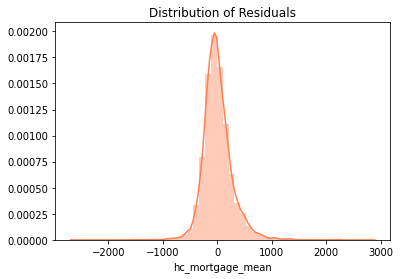

In [64]:
sns.distplot((y_test-y_pred),color="coral");
plt.title("Distribution of Residuals")
plt.show()

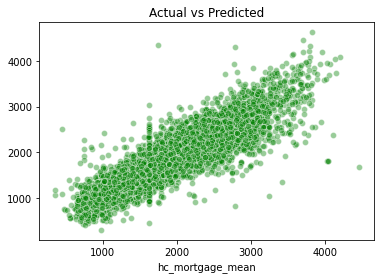

In [65]:
sns.scatterplot(y_test,y_pred,color="green",alpha=.4);
plt.title("Actual vs Predicted")
plt.show()

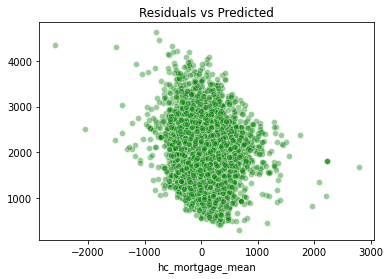

In [66]:
sns.scatterplot((y_test-y_pred),y_pred,color="green",alpha=.4);
plt.title("Residuals vs Predicted")
plt.show()

In [67]:
df_train.STATEID.value_counts()[:5]

6     2908
48    1936
36    1764
12    1586
42    1218
Name: STATEID, dtype: int64

#### Statewise Model

For State: California  

R2 value for Train data :0.7664509901182477 
R2 value for Test data :0.7726122154238565

RMSE value for Train data :304.3888871034223 
RMSE value for Test data :300.5233080272388



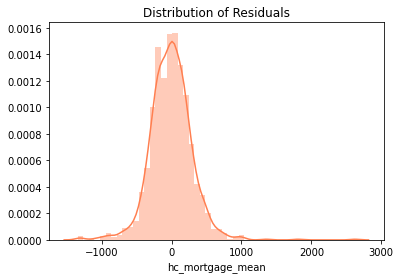

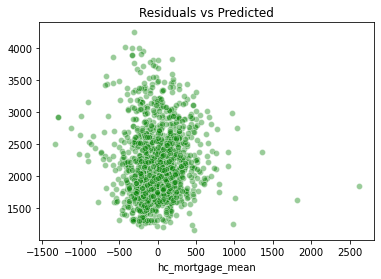

For State: Texas  

R2 value for Train data :0.8383227065596816 
R2 value for Test data :0.8354848423917846

RMSE value for Train data :206.09188322125115 
RMSE value for Test data :230.2158583127793



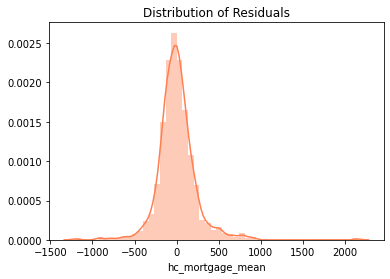

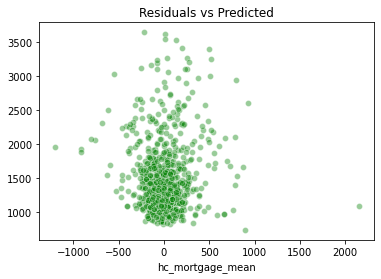

For State: New York  

R2 value for Train data :0.7026918259002268 
R2 value for Test data :0.6978962390905452

RMSE value for Train data :407.5243951378827 
RMSE value for Test data :423.21535855345667



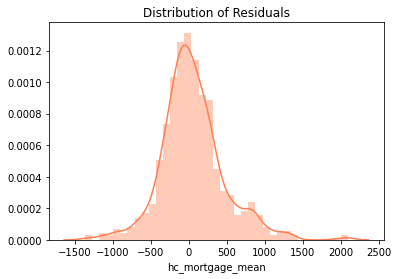

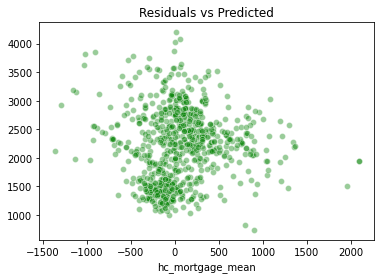

For State: Florida  

R2 value for Train data :0.8364035316778511 
R2 value for Test data :0.8140246138307503

RMSE value for Train data :202.1497103567144 
RMSE value for Test data :238.72770595484613



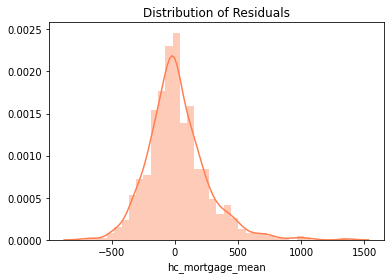

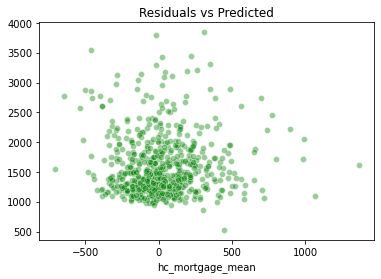

For State: Pennsylvania  

R2 value for Train data :0.8566513028787976 
R2 value for Test data :0.8981092177400428

RMSE value for Train data :183.33697986138355 
RMSE value for Test data :161.85679680365075



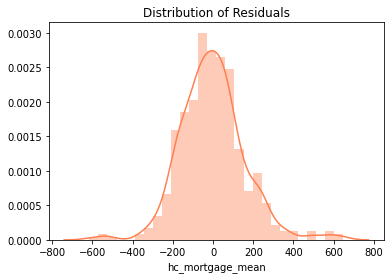

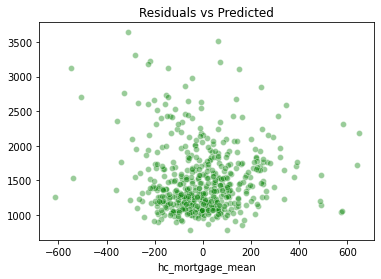

In [68]:
features=['hi_mean','hc_mean','second_mortgage', 'home_equity', 'debt','hs_degree', 'pct_own', 'married', 'married_snp', 'separated', 'divorced','pop_density', 'age_median', 'pop_category']

for id in df_train.STATEID.value_counts()[:5].index:
   
    X_train=df_train[df_train.STATEID==id][features]
    y_train=df_train[df_train.STATEID==id]["hc_mortgage_mean"]
    X_test=df_test[df_test.STATEID==id][features]
    y_test=df_test[df_test.STATEID==id]["hc_mortgage_mean"]
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print("For State: {}  \n\nR2 value for Train data :{} \nR2 value for Test data :{}\n".format(df_train[df_train.STATEID==id]["state"].values[0],lr.score(X_train,y_train),lr.score(X_test,y_test)))
    print("RMSE value for Train data :{} \nRMSE value for Test data :{}\n".format(np.sqrt(mean_squared_error(y_train,lr.predict(X_train))),
                                                                                   np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
                                                                                  ))
    
    sns.distplot((y_test-y_pred),color="coral");
    plt.title("Distribution of Residuals")
    plt.show()
    
    sns.scatterplot((y_test-y_pred),y_pred,color="green",alpha=.4);
    plt.title("Residuals vs Predicted")
    plt.show()